In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
df=pd.read_csv("/Users/patel/Downloads/Car details v3.csv")

In [3]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [4]:
data_1 = df.dropna(axis=0)
data_1

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [5]:
def name_split(x):
    values = x.split(' ')
    return values[0]



In [6]:
data_2 = data_1.copy()
data_2.name = data_1.name.apply(lambda x: name_split(x))

In [7]:
data_2.name.value_counts()

Maruti           2367
Hyundai          1360
Mahindra          758
Tata              719
Honda             466
Toyota            452
Ford              388
Chevrolet         230
Renault           228
Volkswagen        185
BMW               118
Skoda             104
Nissan             81
Jaguar             71
Volvo              67
Datsun             65
Mercedes-Benz      54
Fiat               41
Audi               40
Lexus              34
Jeep               31
Mitsubishi         14
Force               6
Land                6
Isuzu               5
Kia                 4
Ambassador          4
Daewoo              3
MG                  3
Ashok               1
Opel                1
Name: name, dtype: int64

In [8]:
from sklearn.preprocessing import OrdinalEncoder
data_3=data_2.copy()
enc = OrdinalEncoder()
enc.fit(data_3[["name"]])
data_3[["name"]] = enc.transform(data_3[["name"]])
data_3

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,20.0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,26.0,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,10.0,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,11.0,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,20.0,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,11.0,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,11.0,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,20.0,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,27.0,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [9]:
def inttofloat(x):
    return float(x)

data_3.selling_price = data_3.selling_price.apply(lambda x: inttofloat(x))

In [10]:
data_3['age'] = data_3.year.apply(lambda x: 2023 - x)

In [11]:
data_4  =  data_3.drop("year",axis='columns')


In [12]:
data_4.mileage.unique()

array(['23.4 kmpl', '21.14 kmpl', '17.7 kmpl', '23.0 kmpl', '16.1 kmpl',
       '20.14 kmpl', '17.3 km/kg', '23.59 kmpl', '20.0 kmpl',
       '19.01 kmpl', '17.3 kmpl', '19.3 kmpl', '18.9 kmpl', '18.15 kmpl',
       '24.52 kmpl', '19.7 kmpl', '22.54 kmpl', '21.0 kmpl', '25.5 kmpl',
       '26.59 kmpl', '21.5 kmpl', '20.3 kmpl', '21.4 kmpl', '24.7 kmpl',
       '18.2 kmpl', '16.8 kmpl', '24.3 kmpl', '14.0 kmpl', '18.6 kmpl',
       '33.44 km/kg', '23.95 kmpl', '17.0 kmpl', '20.63 kmpl',
       '13.93 kmpl', '16.0 kmpl', '17.8 kmpl', '18.5 kmpl', '12.55 kmpl',
       '12.99 kmpl', '14.8 kmpl', '13.5 kmpl', '26.0 kmpl', '20.65 kmpl',
       '27.3 kmpl', '11.36 kmpl', '17.68 kmpl', '14.28 kmpl',
       '18.53 kmpl', '14.84 kmpl', '21.12 kmpl', '20.36 kmpl',
       '21.27 kmpl', '18.16 kmpl', '22.0 kmpl', '25.1 kmpl', '20.51 kmpl',
       '21.66 kmpl', '25.2 kmpl', '22.9 kmpl', '16.02 kmpl', '20.54 kmpl',
       '22.77 kmpl', '15.71 kmpl', '23.1 kmpl', '19.02 kmpl',
       '19.81 kmpl', '26

In [13]:
data_4.columns.values

array(['name', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power',
       'torque', 'seats', 'age'], dtype=object)

In [14]:
data_4

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,age
0,20.0,450000.0,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,9
1,26.0,370000.0,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,9
2,10.0,158000.0,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,17
3,11.0,225000.0,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,13
4,20.0,130000.0,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,11.0,320000.0,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0,10
8124,11.0,135000.0,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0,16
8125,20.0,382000.0,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0,14
8126,27.0,290000.0,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0,10


In [15]:
def string_to_float(x):
    values = x.split(' ')
    return float(values[0])

string_to_float('23.57 kmpl')

23.57

In [16]:
data_4['mileage'] = data_4['mileage'].apply(lambda x: string_to_float(x))
data_4

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,age
0,20.0,450000.0,145500,Diesel,Individual,Manual,First Owner,23.40,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,9
1,26.0,370000.0,120000,Diesel,Individual,Manual,Second Owner,21.14,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,9
2,10.0,158000.0,140000,Petrol,Individual,Manual,Third Owner,17.70,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,17
3,11.0,225000.0,127000,Diesel,Individual,Manual,First Owner,23.00,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,13
4,20.0,130000.0,120000,Petrol,Individual,Manual,First Owner,16.10,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,11.0,320000.0,110000,Petrol,Individual,Manual,First Owner,18.50,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0,10
8124,11.0,135000.0,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0,16
8125,20.0,382000.0,120000,Diesel,Individual,Manual,First Owner,19.30,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0,14
8126,27.0,290000.0,25000,Diesel,Individual,Manual,First Owner,23.57,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0,10


In [17]:
data_4['engine'] = data_4['engine'].apply(lambda x: string_to_float(x))
data_4

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,age
0,20.0,450000.0,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74 bhp,190Nm@ 2000rpm,5.0,9
1,26.0,370000.0,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52 bhp,250Nm@ 1500-2500rpm,5.0,9
2,10.0,158000.0,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,17
3,11.0,225000.0,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90 bhp,22.4 kgm at 1750-2750rpm,5.0,13
4,20.0,130000.0,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,11.0,320000.0,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85 bhp,113.7Nm@ 4000rpm,5.0,10
8124,11.0,135000.0,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0,16
8125,20.0,382000.0,120000,Diesel,Individual,Manual,First Owner,19.30,1248.0,73.9 bhp,190Nm@ 2000rpm,5.0,14
8126,27.0,290000.0,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,70 bhp,140Nm@ 1800-3000rpm,5.0,10


In [18]:
data_4['max_power'] = data_4['max_power'].apply(lambda x:string_to_float(x))
data_4

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,age
0,20.0,450000.0,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190Nm@ 2000rpm,5.0,9
1,26.0,370000.0,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0,9
2,10.0,158000.0,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,"12.7@ 2,700(kgm@ rpm)",5.0,17
3,11.0,225000.0,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0,13
4,20.0,130000.0,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,11.0,320000.0,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,113.7Nm@ 4000rpm,5.0,10
8124,11.0,135000.0,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,"24@ 1,900-2,750(kgm@ rpm)",5.0,16
8125,20.0,382000.0,120000,Diesel,Individual,Manual,First Owner,19.30,1248.0,73.90,190Nm@ 2000rpm,5.0,14
8126,27.0,290000.0,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,70.00,140Nm@ 1800-3000rpm,5.0,10


In [19]:
data_4['transmission'].value_counts()

Manual       6865
Automatic    1041
Name: transmission, dtype: int64

In [20]:
transmission_dummies = pd.get_dummies(data_4['transmission'],drop_first=True)
transmission_dummies

,Manual
0,1
1,1
2,1
3,1
4,1
...,...
8123,1
8124,1
8125,1
8126,1


In [21]:
data_4['transmission_Manual'] = transmission_dummies

In [22]:
data_4 = data_4.drop(['transmission'],axis=1)


In [23]:
data_4 = data_4.drop(['torque'],axis=1)

In [24]:
data_4['fuel'].value_counts()

Diesel    4299
Petrol    3520
CNG         52
LPG         35
Name: fuel, dtype: int64

In [25]:
fuel_dummies = pd.get_dummies(data_4['fuel'],drop_first=True)


In [26]:
data_4 = pd.concat([data_4, fuel_dummies], axis=1)
data_4


,name,selling_price,km_driven,fuel,seller_type,owner,mileage,engine,max_power,seats,age,transmission_Manual,Diesel,LPG,Petrol
0,20.0,450000.0,145500,Diesel,Individual,First Owner,23.40,1248.0,74.00,5.0,9,1,1,0,0
1,26.0,370000.0,120000,Diesel,Individual,Second Owner,21.14,1498.0,103.52,5.0,9,1,1,0,0
2,10.0,158000.0,140000,Petrol,Individual,Third Owner,17.70,1497.0,78.00,5.0,17,1,0,0,1
3,11.0,225000.0,127000,Diesel,Individual,First Owner,23.00,1396.0,90.00,5.0,13,1,1,0,0
4,20.0,130000.0,120000,Petrol,Individual,First Owner,16.10,1298.0,88.20,5.0,16,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,11.0,320000.0,110000,Petrol,Individual,First Owner,18.50,1197.0,82.85,5.0,10,1,0,0,1
8124,11.0,135000.0,119000,Diesel,Individual,Fourth & Above Owner,16.80,1493.0,110.00,5.0,16,1,1,0,0
8125,20.0,382000.0,120000,Diesel,Individual,First Owner,19.30,1248.0,73.90,5.0,14,1,1,0,0
8126,27.0,290000.0,25000,Diesel,Individual,First Owner,23.57,1396.0,70.00,5.0,10,1,1,0,0


In [27]:
data_4 = data_4.drop('fuel',axis=1)
data_4

,name,selling_price,km_driven,seller_type,owner,mileage,engine,max_power,seats,age,transmission_Manual,Diesel,LPG,Petrol
0,20.0,450000.0,145500,Individual,First Owner,23.40,1248.0,74.00,5.0,9,1,1,0,0
1,26.0,370000.0,120000,Individual,Second Owner,21.14,1498.0,103.52,5.0,9,1,1,0,0
2,10.0,158000.0,140000,Individual,Third Owner,17.70,1497.0,78.00,5.0,17,1,0,0,1
3,11.0,225000.0,127000,Individual,First Owner,23.00,1396.0,90.00,5.0,13,1,1,0,0
4,20.0,130000.0,120000,Individual,First Owner,16.10,1298.0,88.20,5.0,16,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,11.0,320000.0,110000,Individual,First Owner,18.50,1197.0,82.85,5.0,10,1,0,0,1
8124,11.0,135000.0,119000,Individual,Fourth & Above Owner,16.80,1493.0,110.00,5.0,16,1,1,0,0
8125,20.0,382000.0,120000,Individual,First Owner,19.30,1248.0,73.90,5.0,14,1,1,0,0
8126,27.0,290000.0,25000,Individual,First Owner,23.57,1396.0,70.00,5.0,10,1,1,0,0


In [28]:
seller_type_dummies = pd.get_dummies(data_4['seller_type'],drop_first=True)
owner_dummies = pd.get_dummies(data_4['owner'],drop_first=True)

In [29]:
data_4 = pd.concat([data_4,seller_type_dummies,owner_dummies],axis=1)

In [30]:
data_4 = data_4.drop('seller_type',axis=1)
data_4 = data_4.drop('owner',axis=1)

In [31]:
data_4

,name,selling_price,km_driven,mileage,engine,max_power,seats,age,transmission_Manual,Diesel,LPG,Petrol,Individual,Trustmark Dealer,Fourth & Above Owner,Second Owner,Test Drive Car,Third Owner
0,20.0,450000.0,145500,23.40,1248.0,74.00,5.0,9,1,1,0,0,1,0,0,0,0,0
1,26.0,370000.0,120000,21.14,1498.0,103.52,5.0,9,1,1,0,0,1,0,0,1,0,0
2,10.0,158000.0,140000,17.70,1497.0,78.00,5.0,17,1,0,0,1,1,0,0,0,0,1
3,11.0,225000.0,127000,23.00,1396.0,90.00,5.0,13,1,1,0,0,1,0,0,0,0,0
4,20.0,130000.0,120000,16.10,1298.0,88.20,5.0,16,1,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,11.0,320000.0,110000,18.50,1197.0,82.85,5.0,10,1,0,0,1,1,0,0,0,0,0
8124,11.0,135000.0,119000,16.80,1493.0,110.00,5.0,16,1,1,0,0,1,0,1,0,0,0
8125,20.0,382000.0,120000,19.30,1248.0,73.90,5.0,14,1,1,0,0,1,0,0,0,0,0
8126,27.0,290000.0,25000,23.57,1396.0,70.00,5.0,10,1,1,0,0,1,0,0,0,0,0


In [32]:
data_4 = data_4.reset_index(drop=True)

In [60]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_4[[  'name','selling_price', 'km_driven', 'seats','age','mileage','engine','max_power']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]
vif['features'] = variables.columns

In [61]:
vif

,VIF,features
0,7.661524,name
1,4.548813,selling_price
2,3.349880,km_driven
3,44.286178,seats
4,7.708399,age
5,14.455410,mileage
6,40.585342,engine
7,27.164655,max_power


In [35]:
data_cleaned = data_4.copy()
data_cleaned = data_4.drop(['seats','engine','max_power'],axis=1)

In [36]:
data_cleaned

,name,selling_price,km_driven,mileage,age,transmission_Manual,Diesel,LPG,Petrol,Individual,Trustmark Dealer,Fourth & Above Owner,Second Owner,Test Drive Car,Third Owner
0,20.0,450000.0,145500,23.40,9,1,1,0,0,1,0,0,0,0,0
1,26.0,370000.0,120000,21.14,9,1,1,0,0,1,0,0,1,0,0
2,10.0,158000.0,140000,17.70,17,1,0,0,1,1,0,0,0,0,1
3,11.0,225000.0,127000,23.00,13,1,1,0,0,1,0,0,0,0,0
4,20.0,130000.0,120000,16.10,16,1,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7901,11.0,320000.0,110000,18.50,10,1,0,0,1,1,0,0,0,0,0
7902,11.0,135000.0,119000,16.80,16,1,1,0,0,1,0,1,0,0,0
7903,20.0,382000.0,120000,19.30,14,1,1,0,0,1,0,0,0,0,0
7904,27.0,290000.0,25000,23.57,10,1,1,0,0,1,0,0,0,0,0


In [37]:
data_cleaned.columns.values

array(['name', 'selling_price', 'km_driven', 'mileage', 'age',
       'transmission_Manual', 'Diesel', 'LPG', 'Petrol', 'Individual',
       'Trustmark Dealer', 'Fourth & Above Owner', 'Second Owner',
       'Test Drive Car', 'Third Owner'], dtype=object)

In [38]:
log_price = np.log(data_cleaned['selling_price'])
data_cleaned['Log_Price'] = log_price

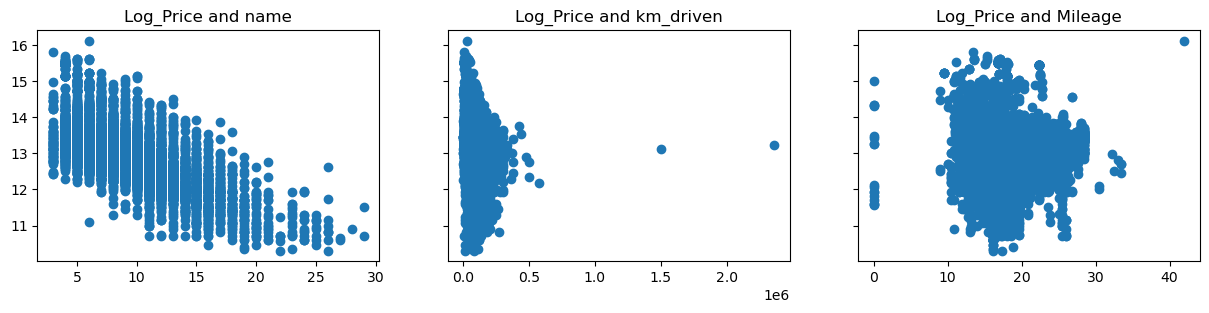

In [62]:
f,(ax1,ax2,ax3) = plt.subplots(1,3,sharey=True,figsize=(15,3))
ax1.scatter(data_cleaned['age'],data_cleaned['Log_Price'])
ax1.set_title('Log_Price and name')
ax2.scatter(data_cleaned['km_driven'],data_cleaned['Log_Price'])
ax2.set_title('Log_Price and km_driven')
ax3.scatter(data_cleaned['mileage'],data_cleaned['Log_Price'])
ax3.set_title('Log_Price and Mileage')
plt.show()

In [40]:
data_cleaned = data_cleaned.drop('selling_price',axis=1)

In [41]:
targets = data_cleaned['Log_Price']
inputs = data_cleaned.drop('Log_Price',axis=1)

In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# transform data
scaled = scaler.fit_transform(inputs)
print(scaled)

[[ 0.31827841  1.34377674  0.98615741 ... -0.58504277 -0.02515614
  -0.26259511]
 [ 1.16699698  0.89474378  0.42619816 ...  1.70927674 -0.02515614
  -0.26259511]
 [-1.09625254  1.24692649 -0.42612921 ... -0.58504277 -0.02515614
   3.80814401]
 ...
 [ 0.31827841  0.89474378 -0.02969788 ... -0.58504277 -0.02515614
  -0.26259511]
 [ 1.30845008 -0.7781241   1.02827824 ... -0.58504277 -0.02515614
  -0.26259511]
 [ 1.30845008 -0.7781241   1.02827824 ... -0.58504277 -0.02515614
  -0.26259511]]


In [43]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(inputs,targets,test_size=0.2,random_state=365)

In [44]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [45]:
y_hat = reg.predict(x_train)

Text(0, 0.5, 'Predictions (y_hat)')

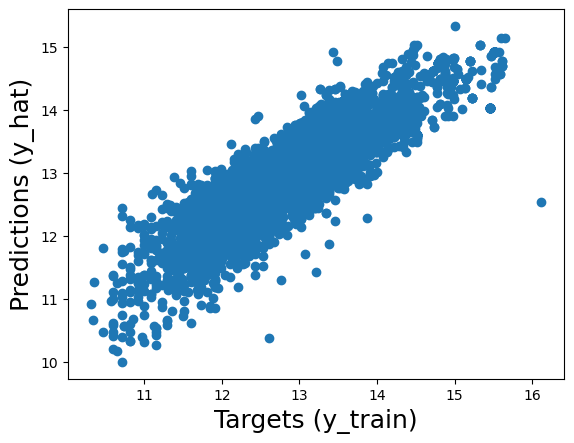

In [46]:
plt.scatter(y_train, y_hat)
# Let's also name the axes
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
# Sometimes the plot will have different scales of the x-axis and the y-axis
# This is an issue as we won't be able to interpret the '45-degree line'
# We want the x-axis and the y-axis to be the same


C:\Users\patel\AppData\Local\Temp\ipykernel_20344\4037566173.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_hat-y_train)


<Axes: xlabel='Log_Price', ylabel='Density'>

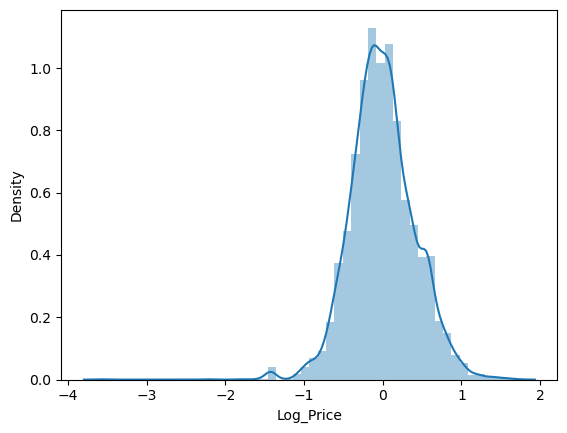

In [47]:
sns.distplot(y_hat-y_train)

In [48]:
reg.score(x_train,y_train)

0.758331888876077

In [49]:
y_hat_test = reg.predict(x_test)

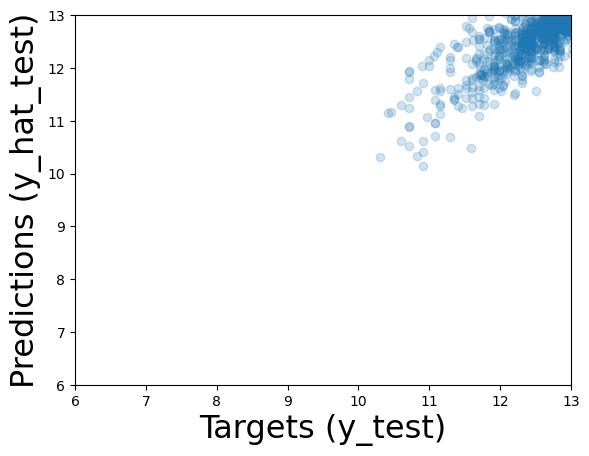

In [50]:
plt.scatter(y_test, y_hat_test,alpha=0.2)
# Let's also name the axes
plt.xlabel('Targets (y_test)',size=23)
plt.ylabel('Predictions (y_hat_test)',size=23)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

C:\Users\patel\AppData\Local\Temp\ipykernel_20344\767682212.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_hat_test-y_test)


<Axes: xlabel='Log_Price', ylabel='Density'>

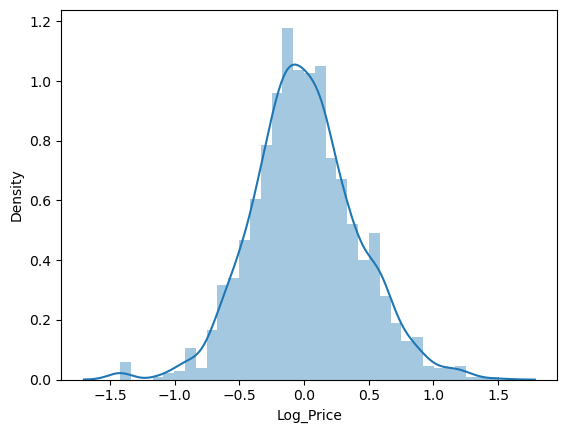

In [51]:
sns.distplot(y_hat_test-y_test)

In [52]:
r2 = reg.score(x_test,y_test)
r2

0.7568795648375808

In [53]:
n = inputs.shape[0]
p = inputs.shape[1]
adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)

In [54]:
adj_r2

0.7564482270993633

In [55]:
train_errors = abs(y_hat - y_train)
print('Mean Absolute Error:', round(np.mean(train_errors), 2), 'degrees.')

Mean Absolute Error: 0.31 degrees.


In [56]:
train_mape = 100 * (train_errors / y_train)
# Calculate and display accuracy
train_accuracy = 100 - np.mean(train_mape)
print('Accuracy:', round(train_accuracy, 2), '%.')

Accuracy: 97.58 %.


In [57]:
test_errors = abs(y_hat_test - y_test)
print('Mean Absolute Error:', round(np.mean(test_errors), 2), 'degrees.')

Mean Absolute Error: 0.31 degrees.


In [58]:
test_mape = 100 * (test_errors / y_test)
# Calculate and display accuracy
test_accuracy = 100 - np.mean(test_mape)
print('Accuracy:', round(test_accuracy, 2), '%.')

Accuracy: 97.57 %.


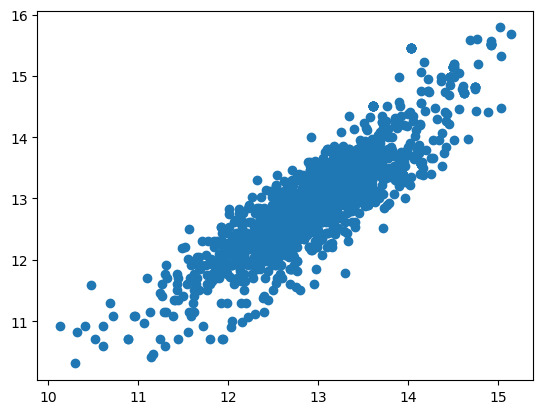

In [64]:
plt.scatter(y_hat_test,y_test)